## Iris sepal length

### The question

<div>
<img src="attachment:51518iris img1.png" width='50%' title=""/>
</div>
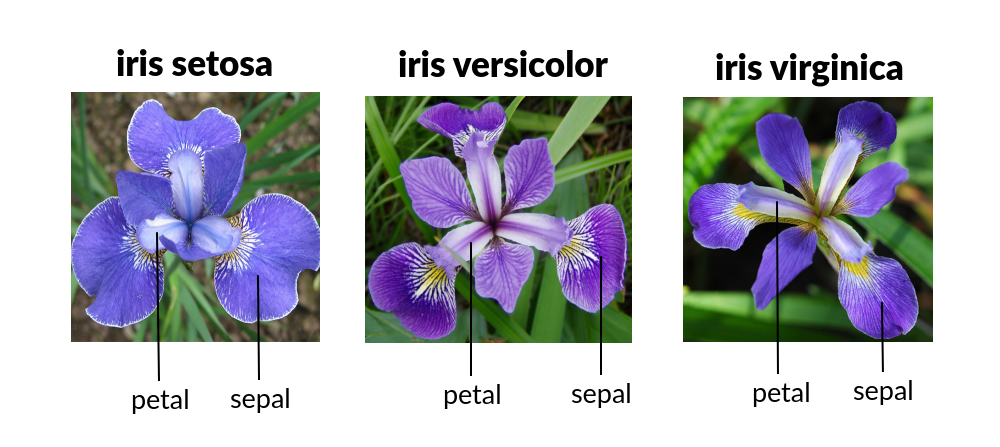

In this dataset of sepal and petal sizes of three species of irises we want to test three hypotheses at the same time.
1. That mean iris sepal length differs between species
2. That mean iris sepal length depends on where they grow
3. That mean iris sepal length of a species depends on where it grows

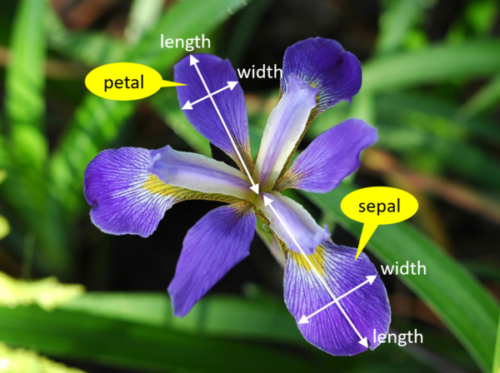

We need to be careful when performing this type of, what's called, "post-hoc analysis". It's very easy to find significant relationships that aren't actually there. To prevent this from happening we must compare our complex models with simpler models to see which explain the data well with the fewest possible terms.

### Imports

In [4]:
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols

### Load and print the data

First we read in the dataset and print it to see how it looks and what the variable names, types and values are.

In [5]:
iris = pd.read_csv('../Datasets/iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,Species,Site
0,5.0,2.0,3.5,1.0,versicolor,Field
1,6.0,2.2,5.0,1.5,virginica,Field
2,5.5,2.3,4.0,1.3,versicolor,Field
3,5.0,2.3,3.3,1.0,versicolor,Field
4,5.5,2.4,3.8,1.1,versicolor,Field
...,...,...,...,...,...,...
145,5.1,3.8,1.5,0.3,setosa,Roadside
146,5.1,3.8,1.9,0.4,setosa,Roadside
147,7.9,3.8,6.4,2.0,virginica,Roadside
148,5.8,4.0,1.2,0.2,setosa,Roadside


There are six variables. The first four, "sepal_length", "sepal_width", "petal_length" and "petal_width", are continuous numerical. The last two, "Species" and "Site" are categorical. The code below prints out the levels (the unique values) of "Species" and "Site".

In [6]:
print(iris['Species'].unique())
print(iris['Site'].unique())

['versicolor' 'virginica' 'setosa']
['Field' 'Marsh' 'Roadside']


There are three species: versicolor, virginica and setosa. And there are three types of site: field, marsh and roadside.

In this notebook we're only examining the relationship between sepal length and species and site. In a more thorough analysis the other sepal and petal measurements would be used.

The response variable is "sepal_length" and the explanatory variables are "Species" and "Site".

On MOnday we looked at the relationship of just two variables in the ladybird dataset, that was ladybird size and predation level, and we used the linear model `size ~ predation`.

Now we want to examine the relationship between three variables: sepal length, species and site. We could first examine sepal length and species with the model `sepal_length ~ Species`. And then examine sepal length and site with the model `sepal_length ~ Site`. 

But we also want to see if site affects sepal length differently for each species. Let's plot the data to see if this is the case. A boxplot is the best to use here because it makes comparison across two categorical variables easier than using, say, a swarm plot.

### Plot the data

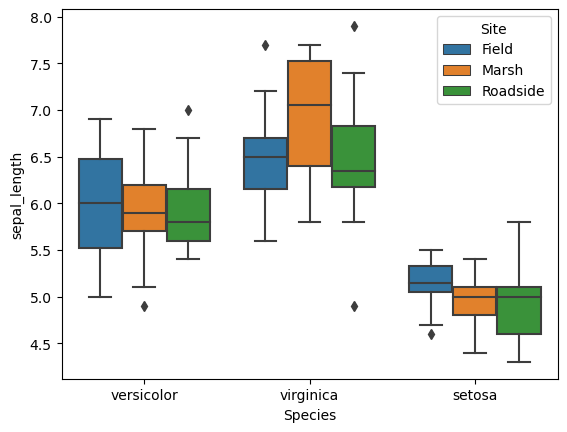

In [8]:
sns.boxplot(x='Species', y='sepal_length', hue='Site', data=iris);

There are clear differences between the species. Setosa has the shortest sepal length and virginica the longest. 

Mean sepal length of versicolor does not seem to vary much between the three sites. However, the mean sepal length of virginica growing in marsh seems to be longer than in field and roadside (compare orange box to blue and green boxes). And sepal length of setosa in field seems to be longer than in marsh and roadside. So "Site" might interact with "Species" to affect sepal length.

However, there is a lot of variability in sepal length in all categories so it is not clear if there are real differences or that the apparent differences are due to the randomness of sampling. For that we need to fit a linear model to the data and do some stats.

The formulae for models that relate more than two variables are a little more complicated than formulae for when there are only two variables to relate. The formula we will start with is

    sepal_length ~ Species + Site + Species:Site

Let's explain what these terms mean. The term "Species" says that sepal length could be related to species irrespective of where they grow, and that is clearly the case in the boxplots. The term "Site" says that sepal length could be related to site of growth irrespective of species. That's perhaps not so clear from the boxplots. The terms "Species" and "Site" are called **main effects**. Finally, the term "Species:Site" says that sepal length could be related to the interaction between species and site. As we noted, this might be the case for virginica and setosa where sepal length might vary depending on where these species grow. Unsurprisingly "Species:Site" is called an **interaction effect**.

How these terms work when we fit a model is a little complicated but makes sense once you understand what's going on. If you do it will make interpreting the output of the model fit so much easier.

But first we need to know what the reference levels are. That is, the levels of "Species" and "Site" against which all other levels will be compared. Remember that `ols` by default picks as the reference level the level which is alphabetically first. But now we have two variables, so one level from each variable will be a reference. In this case it will be "setosa" from "Species" and "Field" from "Site" as these are alphabetically first. 

Variable | Ref level
:-- | :---
Species | setosa
Site | Field

This means that when we fit the model, the estimate ("coef") of `Intercept` will be the mean sepal length of setosa irises growing in fields.

Now let's fit the model and walk through how to interpret its summary.

### Code and fit the model

In [9]:
formula = 'sepal_length ~ Species + Site + Species:Site'
fit = ols(formula, iris).fit()
fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,5.1333,0.147,34.941,0.000,4.843,5.424
Species[T.versicolor],0.8389,0.190,4.423,0.000,0.464,1.214
Species[T.virginica],1.3117,0.186,7.058,0.000,0.944,1.679
Site[T.Marsh],-0.1544,0.188,-0.823,0.412,-0.525,0.217
Site[T.Roadside],-0.1807,0.188,-0.963,0.337,-0.552,0.190
Species[T.versicolor]:Site[T.Marsh],0.0586,0.255,0.230,0.818,-0.445,0.562
Species[T.virginica]:Site[T.Marsh],0.6237,0.258,2.415,0.017,0.113,1.134
Species[T.versicolor]:Site[T.Roadside],0.1685,0.259,0.652,0.516,-0.343,0.680
Species[T.virginica]:Site[T.Roadside],0.2170,0.254,0.855,0.394,-0.285,0.718


### Interpret the summary of the model fit

This looks horrendous, but let's take some time to understand it because it is understandable.

The first row shows the estimate ("coef") of `Intercept`, that is the mean sepal length of the reference levels. The reference levels are "setosa" and "Field". Its value is 5.13 mm. This is indicated by the horizontal red line going through the mean of setosa-Field in Figure 1 below. The white circles are the mean values of each species-site pair. So that you can see what the "coef" values in the table mean, the means are shown in the boxplots of Figure 1 rather than the medians. This is because `ols` calculates means and difference in means and we want to compare the output of the `ols` summary table to the plotted data.

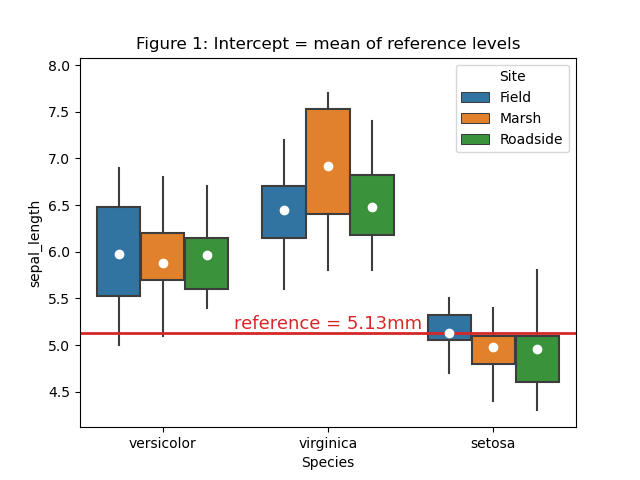

The rest of the row is a test of whether the mean sepal length of setosa-Field irises is significantly difference from zero (*p* < 0.001), which, of course, it is (sepal length must be larger than zero). 

The second row `Species[T.versicolor]`, is the difference between versicolor-Field and setosa-Field as indicated by the arrow on the left of Figure 2 below. The difference is 0.84 mm and the test shows that it is significantly different from zero (*p* < 0.001).

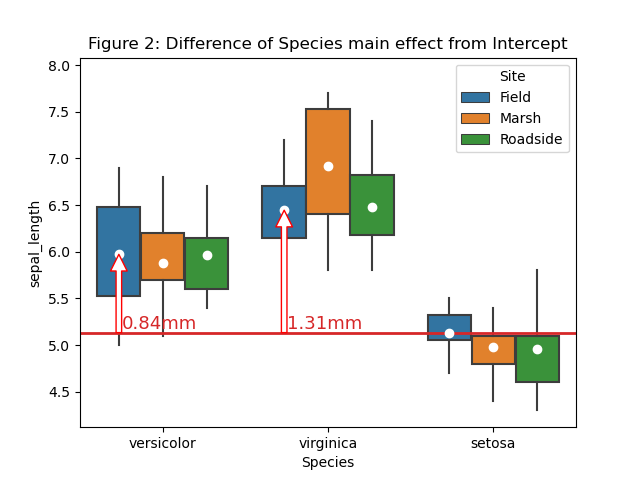

The third row `Species[T.virginica]`, is the difference between virginica-Field and setosa-Field as indicated by the arrow in the middle of Figure 2 above. The difference is 1.31 mm and the test shows that it is significantly different from zero (*p* < 0.001).

The second and third rows are, therefore, tests of the main effect "Species".

The fourth and fifth rows are tests of the main effect "Site". 

The fourth row `Site[T.Marsh]`, is the difference between setosa-Marsh and setosa-Field as indicated by the arrow on setosa-Marsh in Figure 3 below. The difference is -0.15 mm and the test shows that it is not significantly different from zero (*p* = 0.41), hence the small arrow. Note that negative differences have arrows pointing down and positive differences have arrows pointing up.

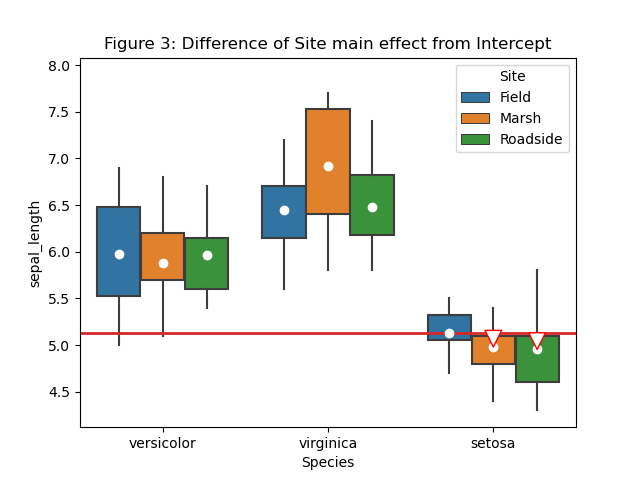

The fifth row `Site[T.Roadside]`, is the difference between setosa-Roadside and setosa-Field as indicated by the arrow on setosa-Roadside in Figure 3 above. The difference is -0.18 mm and the test shows that it is not significantly different from zero (*p* = 0.32).

The next four rows are the tests of the interaction between Species and Site. The only one that is significant is that for virginica-Marsh as we suspected. The difference is 0.62 mm and the test shows that it is significantly different from zero (*p* = 0.017).

To conclude this part of the analysis, there are statistically significant differences of sepal length between species, but none between sites. Except for the sepal length of virginica growing in marsh which is significantly longer than when it grows on the roadside or in the field (*p* = 0.017).

### Model simplification

Based on the boxplots and the statistical tests, no one would argue that the three species of iris have different mean sepal lengths. But the conclusion that irises of the same species growing in different sites have different mean sepal lengths is far from clear in the data. Our analysis above seems to suggest that virginica growing in marsh has a longer mean sepal length than when growing elsewhere. But this is not the case for other species.  

Perhaps mean sepal length of virginica does not differ between sites and we've just been unlucky with our sample that suggests the opposite. 

We can test this idea by removing "Site" completely from our model. That just leaves us with "Species". Let's plot the data by "Species" only, ignoring the information about site of growth.

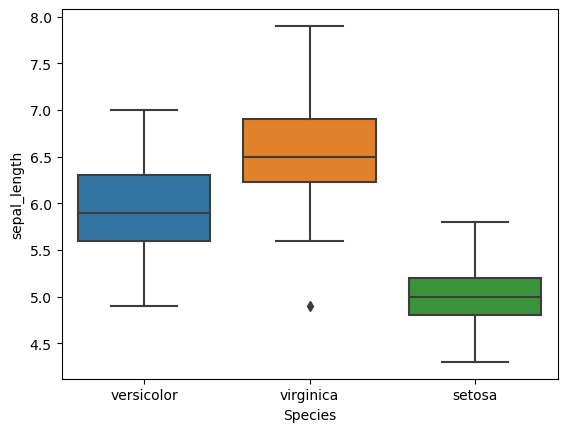

In [10]:
sns.boxplot(x='Species', y='sepal_length', data=iris);

Now let's fit a simpler model that only includes "Species" and ignores "Site".

    sepal_length ~ Species

There is only one reference level for `Intercept` and that is "setosa". Let's fit that model and look at the results.

In [11]:
formula = 'sepal_length ~ Species'
fit2 = ols(formula, iris).fit()
fit2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,5.0060,0.073,68.762,0.000,4.862,5.150
Species[T.versicolor],0.9300,0.103,9.033,0.000,0.727,1.133
Species[T.virginica],1.5820,0.103,15.366,0.000,1.379,1.785


We're just testing "Species" now. So the mean sepal length of setosa (our reference level) is 5.0 mm. Versicolor is significantly longer at 5.9 mm (5.01 + 0.93), and virginica is also significantly longer at 6.6 mm (5.01 + 1.58).

### Model comparison with AIC

Having fitted our simplified model we'll now compare its fit to the fit of our first model to make sure that simplification hasn't made us throw out any interesting results.

There are several ways of doing this. One method is to calculate something called **AIC**. Models with lower AIC are preferred over models with higher AIC.

We can easily output the AIC of a model with the following code.

In [12]:
print(fit.aic, fit2.aic)

231.76252735156658 229.45195655942905


We can see that AIC for the second, simpler model is smaller so we should accept that as the better model for explaining the data.

Even though our initial model suggested that there is evidence that mean sepal length of virginica growing in marsh is longer than virginica growing in field or roadside, the overall evidence in the data, taking into account the other species, is not compelling enough for us to conclude it is something real.

### Report the outcome

Mean sepal length of versicolor irises is 0.9 mm (95% CI [0.7, 1.1] mm) longer than setosa irises (*t* = 9.0, *p* < 0.001). Mean sepal length of virginica irises is 1.6 mm (95% CI [1.4, 1.8] mm) longer than setosa irises (*t* = 15.4, *p* < 0.001). There are no significant effects of site nor significant interactions between site and species. 